# Example: traveling salesman

Traveling salesman

We want to find a shortest path to travel from starting point, 
pass through all stops, and back to the starting point.
Doing this by visiting each stop only once.

Application in logistics

Find a sequence of towns to visit so that the total distance is minimal
and all towns are visited and visited only once.

\begin{align}
\; & \min_{\{ x_0, \ldots, x_{N-1} \}} \sum_{i=1}^{N-1} \mathrm{dist(x_{i-1}, x_i)}
\\
\mbox{s.t.} & \\
\; & x_i \neq x_j \; \mbox{ if } i \neq j \\
\end{align}
and $x_i \in \Omega$ for all $i$'s.
There are $N$ towns in $\Omega$.

We work for a version with the initial town is specified, i.e., $x_0$ is given.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
towns ={'A': (91, 492), 'B': (400, 327), 'C': (253, 288), \
    'D': (165, 299), 'E': (562, 293), 'F': (305, 449), \
    'G': (375, 270), 'H': (534, 350), 'I': (473, 506), \
    'L': (165, 379), 'M': (168, 339), 'N': (406, 537), \
    'O': (131, 571), 'P': (320, 368), 'R': (233, 410), \
    'S': (207, 457), 'T': (94, 410), 'U': (456, 350), \
    'V': (509, 444), 'Z': (108, 531)}


In [3]:
t = 'A'
towns[t][0], towns[t][1]

(91, 492)

In [4]:
markers = towns.keys()

markers

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'Z'])

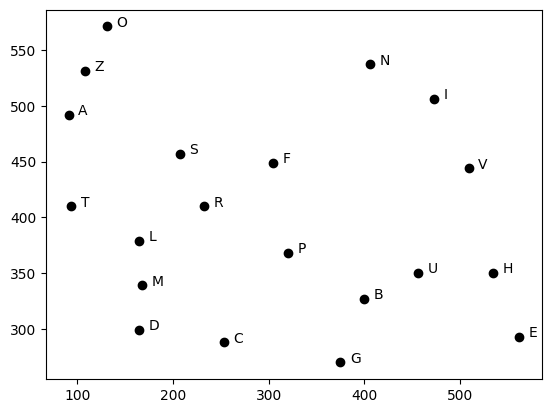

In [5]:
locations = np.array( [towns[t] for t in towns] )

plt.plot(locations[:,0], locations[:,1], 'ko')

offx = 10
offy = 0
for i, m in enumerate(markers):
    plt.text(locations[i,0]+offx, locations[i,1]+offy, m)

* What should be the state?
  * Current town?
    * How can we decide which town we have visited?
      * To do ```goal_test```: visited all towns.
      * To do ```successor```: to find which town we have not visited.

  * A traveling path so far?
    * With the traveling path, we can determine which we have visited.
    * The state is long and complex.
    * Let's try the traveling path.
    
Programming constraint: state has to be hashable.
* Python list is not hashable.
* Tuple is hashable.


In [6]:
INF = 700

class TravelSalesmanProblem:
    def __init__(self, initial, towns):
        self.initial = initial
        self.eval_count = 0
        self.towns = towns

        # centroid for heuristic
        xc, yc = 0,0
        for t in towns:
            xc += towns[t][0]
            yc += towns[t][1]

        xc /= len(towns)
        yc /= len(towns)
        
        self.centroid = np.array((xc, yc))
        
    def successor(self, s):
        """
        Take s: current state/current path
            * s is a list of strings, e.g., ['B', 'A', 'G']
        Return a list of (action, next_state) pairs.
        """
        transits = []
        
        for town in self.towns.keys():

            if town not in s:
                sp = [town] + list(s)
                act = s[0] + '-' + town
        
                transits.append((act, tuple(sp)))
        
        return transits

    def path_cost(self, cost_to_s, s, action, snext):
        '''
        Let transit cost be Euclidean distance
        '''

        s_coord = np.array(self.towns[s[0]])
        snext_coord = np.array(self.towns[snext[0]])
        diff = s_coord - snext_coord
        
        dist = np.sqrt( np.sum(diff**2) )
        
        transit_cost = dist
        return cost_to_s + transit_cost

    def goal_test(self, state):
        # goal is to pass through all towns

        return len(state) == len(self.towns.keys())


    def h(self, state):
        '''
        Discourage against going back. Favor going in the same direction.
        The idea is to avoid criss-crossing.
        '''
        if len(state) < 3:
            return INF

        #
        town0 = np.array(self.towns[state[0]])
        town1 = np.array(self.towns[state[1]])
        town2 = np.array(self.towns[state[2]])

        # Direction from town 2 to town 1
        v12 = town1 - town2
        v12  = v12/np.dot(v12, v12)

        # Direction from town 1 to town 0 (latest addition)
        v01 = town0 - town1
        v01  = v01/np.dot(v01, v01)

        # prod is positive, when both follow the similar direction
        prod = np.dot(v12, v01)

        return 1/(np.exp(prod) + 0.001)


        


In [7]:
tsp = TravelSalesmanProblem(('S'), towns)

In [8]:
tsp.initial

'S'

In [9]:
tsp.successor(('B', 'S', 'A', 'O'))

[('B-C', ('C', 'B', 'S', 'A', 'O')),
 ('B-D', ('D', 'B', 'S', 'A', 'O')),
 ('B-E', ('E', 'B', 'S', 'A', 'O')),
 ('B-F', ('F', 'B', 'S', 'A', 'O')),
 ('B-G', ('G', 'B', 'S', 'A', 'O')),
 ('B-H', ('H', 'B', 'S', 'A', 'O')),
 ('B-I', ('I', 'B', 'S', 'A', 'O')),
 ('B-L', ('L', 'B', 'S', 'A', 'O')),
 ('B-M', ('M', 'B', 'S', 'A', 'O')),
 ('B-N', ('N', 'B', 'S', 'A', 'O')),
 ('B-P', ('P', 'B', 'S', 'A', 'O')),
 ('B-R', ('R', 'B', 'S', 'A', 'O')),
 ('B-T', ('T', 'B', 'S', 'A', 'O')),
 ('B-U', ('U', 'B', 'S', 'A', 'O')),
 ('B-V', ('V', 'B', 'S', 'A', 'O')),
 ('B-Z', ('Z', 'B', 'S', 'A', 'O'))]

In [10]:
tsp.path_cost(100, ['S', 'B', 'A'], 'S - Z', ['Z', 'S', 'B', 'A'])

223.6001618121918

In [11]:
tsp.goal_test(['S', 'B', 'A'])

False

In [12]:
tsp.goal_test(towns.keys())

True

In [13]:
tsp.towns.keys()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'Z'])

In [14]:
tsp.h(['A', 'B'])

700

In [15]:
tsp.h(['C', 'B', 'A'])

0.9990147085872297

In [16]:
tsp.h(['B', 'C', 'A'])

0.9989909160285392

## Breadth-first search

Minimize ```node.depth```

Recall

* Time complexity $O(b^d)$
* Space complexity $O(b^d)$

In [17]:
len(tsp.successor(['B']))

19

In [18]:
len(tsp.successor(['B', 'G']))

18

Branching factor decreases at each depth.
With maximal depth of 20 (20 towns),
* we can guess average $b \approx 10$ (half the max);
* $d = 20$.

In [19]:
10**20

100000000000000000000

In [32]:
np.ceil(2.5)

3.0

In [33]:
ns = [5, 6, 7, 8, 9, 10, 20]
for n in ns:
    print(n, ' towns:', np.ceil(n/2)**n)

5  towns: 243.0
6  towns: 729.0
7  towns: 16384.0
8  towns: 65536.0
9  towns: 1953125.0
10  towns: 9765625.0
20  towns: 1e+20


In [34]:
import SearchAUX2 as m
import random

def fee(node):
    return node.depth + 0.001*random.random()

In [35]:
import time

# We work on the small version to see its work.
# The full version is more than BFS can handle: O(b^d)
towns1 = {'A': (91, 492),
 'B': (400, 327),
 'C': (253, 288),
 'D': (165, 299),
 'E': (562, 293)}

tsp = TravelSalesmanProblem(('C'), towns1)

# Try the full scenary
# tsp = TravelSalesmanProblem(('C'), towns)

t1 = time.time()
rst, scost = m.best_first_search(tsp, fee, show=False)
t2 = time.time()

print('Search time =', t2 - t1)
print('Solution =', rst.state)
print('Search cost =', scost)
print('Eval count =', tsp.eval_count)
print('Path cost =', rst.path_cost)

Search time = 0.002329111099243164
Solution = ('D', 'A', 'E', 'B', 'C')
Search cost = 41
Eval count = 0
Path cost = 1035.6292154760029


## Uniform-cost search

Minimize ```node.path_cost```

In [36]:
import SearchAUX2 as m
import random

In [48]:
def fee(node):
    return node.path_cost + 0.001*random.random()


In [49]:
towns1 = {'A': (91, 492),
 'B': (400, 327),
 'C': (253, 288),
 'D': (165, 299),
 'E': (562, 293)}

tsp = TravelSalesmanProblem(('E'), towns1)

# Try the full scenario
# tsp = TravelSalesmanProblem(('C'), towns)

In [50]:
import time

In [53]:
t1 = time.time()
rst, scost = m.best_first_search(tsp, fee, show=False)
t2 = time.time()

print('Search time =', t2 - t1)
print('Solution =', rst.state[::-1])
print('Search cost =', scost)
print('Eval count =', tsp.eval_count)
print('Path cost =', rst.path_cost)

Search time = 0.0020914077758789062
Solution = ('E', 'B', 'C', 'D', 'A')
Search cost = 18
Eval count = 0
Path cost = 613.0000571573354


In [54]:
rst.path_cost

613.0000571573354

## A*

Minimize ```node.path_cost```

In [55]:
def fee(node):
    return node.path_cost + tsp.h(node.state) + 0.001*random.random()


In [57]:
tsp = TravelSalesmanProblem(('E'), towns1)

t1 = time.time()
rst, scost = m.best_first_search(tsp, fee, show=False)
t2 = time.time()

print('Search time =', t2 - t1)
print('Solution =', rst.state[::-1])
print('Search cost =', scost)
print('Eval count =', tsp.eval_count)
print('Path cost =', rst.path_cost)

Search time = 0.0021996498107910156
Solution = ('E', 'B', 'C', 'D', 'A')
Search cost = 9
Eval count = 0
Path cost = 613.0000571573354


## Hill Climbing

Maximize ```problem.node_val```

In [129]:
from LocalSearchAuxV2 import hill_climbing_random_restart

In [130]:
from SearchAUX2 import Node

In [131]:
import inspect

lines = inspect.getsource(hill_climbing_random_restart)
print(lines)

def hill_climbing_random_restart(problem, MAXITER, nRestart):
    best = None
    best_val = -infinity
    search_cost = 0
    
    for n in range(nRestart):
        current = problem.random_pick(1)[0]
        current_val = problem.node_val(current)
    
        # Each HC run
        for i in range(MAXITER):
            hood = current.expand(problem)        
            search_cost += 1

            if len(hood) < 1:
                break

            neighbor = argmax(hood, fn=problem.node_val)
            neighbor_val = problem.node_val(neighbor)
            if neighbor_val <= current_val:
                # reach plateau
                break
            current = neighbor
            current_val = neighbor_val
        if current_val > best_val:
            best = current
            best_val = current_val
        if problem.goal_test(best.state):
            return best, search_cost
            
    return best, search_cost



HC with random restart needs problem to have
* ```random_pick```
  * randomly pick a starting town
* ```node_val```

In [132]:
list(towns.keys())[3]

'D'

## TSPPlus

In [155]:
class TSPPlus(TravelSalesmanProblem):
    def random_pick(self, K):  
        N = len(self.towns)

        randset = []
        for k in range(K):
            pick = random.randrange(N)
            picked = list(self.towns.keys())[pick]            
            randset.append(Node(tuple(picked)))
        return tuple(randset)
    
    def node_val(self, node):
        MAXPATHCOST = 1e5
        
        self.eval_count += 1
        return MAXPATHCOST*len(node.state) -1*node.path_cost

In [134]:
tsp = TSPPlus(('E'), towns1)

t1 = time.time()
rst, scost = hill_climbing_random_restart(tsp, 
            MAXITER=20, nRestart=100)
t2 = time.time()

print('Search time =', t2 - t1)
print('Solution =', rst.state[::-1])
print('Search cost =', scost)
print('Eval count =', tsp.eval_count)
print('Path cost =', rst.path_cost)

Search time = 0.0007603168487548828
Solution = ('D', 'C', 'B', 'E', 'A')
Search cost = 5
Eval count = 19
Path cost = 917.613784621343


## Simulated Annealing

Maximize ```problem.node_val```

In [114]:
from LocalSearchAuxV2 import simulated_annealing, step_schedule

In [124]:
import inspect

lines = inspect.getsource(simulated_annealing)
print(lines)

def simulated_annealing(problem, schedule, nSteps=100):
    current = Node(problem.initial)
    current_val = problem.node_val(current)
    search_cost = 0
    for t in range(nSteps):
        T = schedule(t)
        if T < epsilon:    # numerical stable version for T == 0
            return current, search_cost
        
        next_step = random.choice(current.expand(problem))
        next_val = problem.node_val(next_step) 
        search_cost += 1
        
        if problem.goal_test(next_step.state):
            return next_step, search_cost
        
        delta_E = next_val - current_val
        if delta_E > 0 or probability(np.exp(delta_E/T)):
            current = next_step
            current_val = next_val

    return current, search_cost # return the best found so far



In [119]:
tsp = TSPPlus(('E'), towns1)

t1 = time.time()
rst, scost = simulated_annealing(tsp, 
                    step_schedule, nSteps=4000)
t2 = time.time()

print('Search time =', t2 - t1)
print('Solution =', rst.state[::-1])
print('Search cost =', scost)
print('Eval count =', tsp.eval_count)
print('Path cost =', rst.path_cost)

Search time = 0.0005819797515869141
Solution = ('E', 'A', 'D', 'C', 'B')
Search cost = 4
Eval count = 5
Path cost = 958.7845971348186


## Local Beam Search

Maximize ```problem.node_val``` through ```LBS_fee``` function

In [137]:
from LocalSearchAuxV2 import local_beam_search

In [138]:
import inspect

lines = inspect.getsource(local_beam_search)
print(lines)

def local_beam_search(problem, K, nSteps):
    pool = BeamPool(max, lambda n: LBS_fee(problem, n))
    pool.extend(problem.random_pick(K))
    search_cost = 0
    for v, n in pool.A: 
        if problem.goal_test(n.state): return n, search_cost
    for t in range(nSteps):
        all_children = []
        for v, n in pool.A:
            node_children = n.expand(problem)
            search_cost += 1
            for child in node_children:
                if problem.goal_test(child.state):
                    return child, search_cost
                all_children.append(child)
        pool.extend(all_children)
        pool.pick_top(K)
    return pool.pop(), search_cost  # Return the best found



In [153]:
tsp = TSPPlus(('E'), towns1)

t1 = time.time()
rst, scost = local_beam_search(tsp, 
                    K=1, nSteps=100)
t2 = time.time()

print('Search time =', t2 - t1)
print('Solution =', rst.state[::-1])
print('Search cost =', scost)
print('Eval count =', tsp.eval_count)
print('Path cost =', rst.path_cost)

Search time = 0.0007755756378173828
Solution = ('A', 'D', 'C', 'B', 'E')
Search cost = 4
Eval count = 10
Path cost = 613.0000571573353


## Genetic Algorithm

Maximize ```problem.node_val``` through the ```fitness``` function

### Chromosome

* Search path, e.g., ```('A', 'E')```, ```('A', 'E', 'C')```
  * This is not a good chromosome: they are variable in length.
* Chromosome may be one combination of all posible full town sequences.
  * E.g., for 5-town scenario,
    * ```('A', 'B', 'C', 'D', 'E')```

### Fitness function

* 1. Visiting all towns can be enforced through careful population initialization, recombination, and mutation processes.
 
* 2. Fitness function is just the path cost. 

In [3]:
class gTSP:
    
    def __init__(self, towns):
        self.eval_count = 0
        self.towns = towns    
        self.dist = {}

    def path_cost(self, route):

        cost = 0
        t1 = route[0]
        for t2 in route[1:]:
            k1, k2 = t1, t2

            # Make it alphabetical order
            if k1 > k2:
                k1,k2 = k2,k1

            # Look up the distance table
            if (k1, k2) in self.dist:
                cost += self.dist[(k1,k2)]
            else:
                # Calculate the distance between k1 and k2
                x1, y1 = self.towns[k1]
                x2, y2 = self.towns[k2]
                d = np.sqrt( (x1 - x2)**2 + (y1 - y2)**2 )
                self.dist[(k1,k2)] = d

                cost += d
            # end if-else
            t1 = t2
        # end for
        return cost

In [5]:
towns1 = {'A': (91, 492),
 'B': (400, 327),
 'C': (253, 288),
 'D': (165, 299),
 'E': (562, 293)}

gtsp = gTSP(towns1)

In [6]:
gtsp.path_cost(('A','B'))

350.2941620980858

In [204]:
gtsp.dist

{('A', 'B'): 350.2941620980858}

In [205]:
gtsp.path_cost(('B', 'A'))

350.2941620980858

In [206]:
gtsp.path_cost(('C', 'A', 'B', 'C'))

762.8791845188337

In [207]:
gtsp.dist

{('A', 'B'): 350.2941620980858,
 ('A', 'C'): 260.4995201531089,
 ('B', 'C'): 152.0855022676389}

In [196]:
tsp.path_cost(0, 'A', None, 'C')

260.4995201531089

In [208]:
gtsp.path_cost(('A', 'B', 'C', 'D', 'E'))

988.109837058614

To make (1) positive fitness and (2) high fitness ~ low path cost,

* ```fitness(c) = LARGE - gtsp.path_cost(c)```
* ```LARGE = 5000```

### Recombination and mutation

To ensure the visit-all constraint, 
* it may be easier to do just mutation.
* Mutation may be do it widely: shuffle part of the chromosome.

In [213]:
p = np.random.uniform(0, 1, 5)
p

array([0.73594033, 0.83678919, 0.54980376, 0.32105724, 0.39061915])

In [214]:
0.5 > p

array([False, False, False,  True,  True])

In [228]:
np.random.choice(range(3), 3)

array([2, 0, 1])

In [7]:
def mutation(selected_pop, flip_prob=0.5):
    '''
    selected_pop: [(chromosome), (chromosome), ...]
    '''
    pop_size = len(selected_pop)
    nbp = len(selected_pop[0])
    
    p = np.random.uniform(0, 1, pop_size)
    flips = flip_prob > p
    f = -1*(2*flips - 1)

    pop = [selected_pop[n][::f[n]] for n in range(pop_size)]
    m = int(np.floor(nbp/2))
    mlen = nbp - m
    
    pop = [pop[n][:m] + list(np.random.choice(pop[n][m:], mlen, replace=False)) 
             for n in range(pop_size)]

    return pop

In [8]:
pop = [['E', 'D', 'A', 'C', 'B'],
 ['E', 'C', 'A', 'D', 'B'],
 ['B', 'D', 'C', 'A', 'E']]

mutation(pop, flip_prob=0.5)

[['B', 'C', 'A', 'E', 'D'],
 ['E', 'C', 'B', 'A', 'D'],
 ['B', 'D', 'C', 'E', 'A']]

In [13]:
gtsp = gTSP(towns1)

num_gen = 3
pop_size=5
chromosome0 = list(towns1.keys())
nbp = len(chromosome0)

first_pop = [ list(np.random.choice(chromosome0, nbp, replace=False)) 
             for n in range(pop_size)] 
# print('First pop:')
# print(first_pop)

LARGE = 5000
fitness = lambda c: LARGE - gtsp.path_cost(c)

# GA
pop = first_pop
best = ['', 0] # [<chromosome>, <fitness>]
for i in range(num_gen):

    # Selection
    fits = np.zeros(pop_size)
    for j, c in enumerate(pop):
        fit = fitness(c)
        fits[j] = fit

    jmax = np.argmax(fits)
    maxfit = fits[jmax]
    if maxfit > best[1]:
        best[0] = pop[jmax]
        best[1] = maxfit

    selected = [best[0] for n in range(pop_size)]
    
    # Reproduction: mutation
    pop = mutation(selected)
    # print(i, "population:")
    # print(pop)

fits = np.zeros(pop_size)
for j, c in enumerate(pop):
    fit = fitness(c)
    fits[j] = fit

jmax = np.argmax(fits)
maxfit = fits[jmax]
if maxfit > best[1]:
    best[0] = pop[jmax]
    best[1] = maxfit
# END


print('Solution =', best[0])
print('Path cost =', gtsp.path_cost(best[0]))


Solution = ['A', 'D', 'C', 'B', 'E']
Path cost = 613.0000571573353
